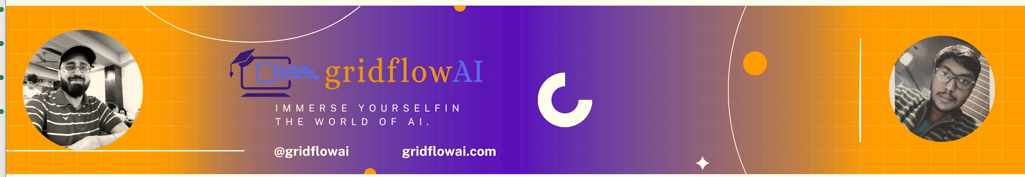

--------------------
#### Movie Sentiment Analysis 

- IMDB dataset
- data processing
- keras tokenizer
- RNN
- Evaluate
----------------------

#### dataset 

can be downloaded from this Kaggle link.https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

The file contains 50,000 records and two columns: review and sentiment. 

The review column contains text for the review and the sentiment column contains sentiment for the review. 

The sentiment column can have two values i.e. "positive" and "negative" which makes our problem a binary classification problem.

In [3]:
import pandas as pd
import numpy as np
from numpy import array
import re
import nltk

import matplotlib.pylab as plt

from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, BatchNormalization
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D

from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split

#### Importing and Analyzing the Dataset

In [4]:
location = r'D:\AI-DATASETS\02-MISC-large\keras\datasets\IMDB-cleaned-text.csv'

In [5]:
movie_reviews = pd.read_csv(location)

In [6]:
movie_reviews.isnull().values.any()

False

In [7]:
movie_reviews.shape

(50000, 6)

In [8]:
pd.set_option('max_colwidth', None)

sample rows a few times and note down data processing steps

In [9]:
movie_reviews.sample(3)

,Unnamed: 0,review,sentiment,contractions,ExpandedText,CleanedText
34494,34494,"On the night of his bachelor party, Paul Coleman (Jason Lee) meets the gorgeous dancer Becky (Julia Stiles) in the bar, they drink a lot together and in the next morning, he wakes up with her on the bed. His future mother-in-law calls him and informs that his fiancée Karen (Selma Blair) might be arriving in his apartment, and he desperately asks Becky to leave his place in a hurry. Sooner, he finds that her has crabs, and later, in the preparation of his wedding dinner party, he realizes that Becky is the cousin of Karen. This is the beginning of a very funny comedy, with hilarious situations. The first attraction of this movie certainly is the central trio of actresses and actor. Julia Stiles and Selma Blair, who are excellent actresses and extremely gorgeous, and Jason Lee, who is amazingly funny, have good performances. I laughed a lot along the story, but there are some scenes that are really hilarious. For example, when Paul finds Becky in his bed; when he finds her paints; his imagination in many situations; in the drugstore, trying to buy and get explanations about the crab medicine; most of the scenes of his neighbor, the minister; when Karen calls the department store; or when the police finds a suspect of assaulting Paul. I could number many other scenes, but better off the reader rent or buy this movie and have lots of fun. My vote is seven.<br /><br />Title (Brazil):""Louco Por Elas"" (""Crazy For Them"")",positive,[],"On the night of his bachelor party, Paul Coleman (Jason Lee) meets the gorgeous dancer Becky (Julia Stiles) in the bar, they drink a lot together and in the next morning, he wakes up with her on the bed. His future mother-in-law calls him and informs that his fiancée Karen (Selma Blair) might be arriving in his apartment, and he desperately asks Becky to leave his place in a hurry. Sooner, he finds that her has crabs, and later, in the preparation of his wedding dinner party, he realizes that Becky is the cousin of Karen. This is the beginning of a very funny comedy, with hilarious situations. The first attraction of this movie certainly is the central trio of actresses and actor. Julia Stiles and Selma Blair, who are excellent actresses and extremely gorgeous, and Jason Lee, who is amazingly funny, have good performances. I laughed a lot along the story, but there are some scenes that are really hilarious. For example, when Paul finds Becky in his bed; when he finds her paints; his imagination in many situations; in the drugstore, trying to buy and get explanations about the crab medicine; most of the scenes of his neighbor, the minister; when Karen calls the department store; or when the police finds a suspect of assaulting Paul. I could number many other scenes, but better off the reader rent or buy this movie and have lots of fun. My vote is seven.<br /><br />Title (Brazil):""Louco Por Elas"" (""Crazy For Them"")",On the night of his bachelor party Paul Coleman Jason Lee meets the gorgeous dancer Becky Julia Stiles in the bar they drink lot together and in the next morning he wakes up with her on the bed His future mother in law calls him and informs that his fianc Karen Selma Blair might be arriving in his apartment and he desperately asks Becky to leave his place in hurry Sooner he finds that her has crabs and later in the preparation of his wedding dinner party he realizes that Becky is the cousin of Karen This is the beginning of very funny comedy with hilarious situations The first attraction of this movie certainly is the central trio of actresses and actor Julia Stiles and Selma Blair who are excellent actresses and extremely gorgeous and Jason Lee who is amazingly funny have good performances laughed lot along the story but there are some scenes that are really hilarious For example when Paul finds Becky in his bed when he finds her paints his imagination in many situations in the drugstore trying to buy and g

text contains punctuations, brackets, and a few HTML tags as well. 

We will preprocess this text distribution of positive and negative sentiments in our dataset.

D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


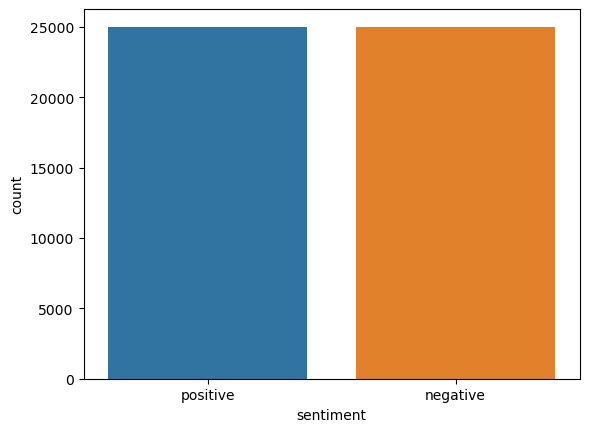

In [10]:
import seaborn as sns

sns.countplot(x='sentiment', data=movie_reviews);

From the output, it is clear that the dataset contains equal number of positive and negative reviews

Next, we need to convert our labels into digits. 

Since we only have two labels in the output i.e. "positive" and "negative".

We can simply convert them into integers by replacing "positive" with digit 1 and negative with digit 0

In [11]:
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

Finally, we need to divide our dataset into train and test sets. The train set will be used to train our deep learning models while the test set will be used to evaluate how well our model performs.

We can use train_test_split method from the sklearn.model.selection module

In [12]:
X = movie_reviews['CleanedText']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size   = 0.20, 
                                                    random_state= 42)

#### Tokenize 
- using keras tokenizer

In the word-to-index dictionary, each word in the corpus is used as a key, while a corresponding unique index is used as the value for the key.

`num_words:`
- the maximum number of words to keep, based on word frequency. 
- Only the most common `num_words-1` words will be kept.

In [14]:
%%time
num_words = 15000

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

CPU times: total: 2.55 s
Wall time: 6.54 s


In [15]:
print(tokenizer.document_count)

40000


In [16]:
for token, count in zip(list(tokenizer.word_counts.keys())[:15], list(tokenizer.word_counts.values())[:15]):
    print(token, ' : ', count)

that  :  115759
is  :  221840
what  :  26092
kept  :  1204
asking  :  375
myself  :  1848
during  :  3442
the  :  534563
many  :  10734
fights  :  435
screaming  :  403
matches  :  155
swearing  :  89
and  :  259130
general  :  1211


In [19]:
# print(tokenizer.word_docs,'\n')
# print(tokenizer.word_index,'\n')

Transforms each text in texts to a sequence of integers.

Only top `num_words-1` most frequent words will be taken into account.
Only words known by the tokenizer will be taken into account.

In [17]:
%%time
X_train = tokenizer.texts_to_sequences(X_train)
X_test  = tokenizer.texts_to_sequences(X_test)

CPU times: total: 1.92 s
Wall time: 4.56 s


In [19]:
print(X_train[:1])

[[9, 4, 44, 771, 2101, 513, 290, 1, 106, 1842, 1969, 4255, 6378, 2, 767, 4757, 9, 1, 219, 1, 6061, 82, 749, 53, 50, 18, 99, 3, 1, 24, 1948, 100, 31, 21, 32, 117, 1086, 9, 6, 4, 2301, 1149, 5, 437, 44, 529, 5, 88, 28, 20, 38, 877, 387, 14, 1, 152, 5, 2911, 23, 4292, 19, 2873, 9, 43, 77, 212, 73, 123, 7, 81, 3076, 188, 19, 225, 2, 1, 416, 193, 4860, 94, 10, 61, 24, 14, 14347, 76, 349, 290, 17, 16, 6, 193, 25, 293, 9, 12, 1, 1802, 9962, 114, 402, 2, 12, 1, 1634, 11113, 551, 65, 408, 364, 37, 10, 115, 44, 112, 352, 28, 11719, 33, 16, 42, 11, 88, 45, 6717, 14, 348, 12145, 1130, 60, 7, 1, 448, 208, 977, 5, 4099, 7, 171, 3, 32, 422, 667, 594, 9, 70, 52, 226, 109, 815, 33, 165, 27, 211, 9, 4, 1, 412, 351, 55, 3672, 266, 10111, 154, 1656, 182, 4, 1, 11503, 11308, 697, 1886, 1, 1162, 3, 2815, 11309, 3648, 1636, 2, 144, 94, 220, 3, 198, 311, 2, 94, 1036, 15, 87, 3, 130, 2767, 8586, 16, 68, 10, 9075, 97, 3, 1, 3949, 290, 8, 13, 960, 33, 1, 473, 2545, 234, 70, 78, 106, 106, 665, 9824, 58, 12617, 84

If you view the X_train variable in variable explorer, you will see that it contains 40,000 lists where each list contains integers. 

Each list actually corresponds to each sentence in the training set. 

You will also notice that the size of each list is different. This is because sentences have different lengths.

We set the maximum size of each list to 100. We can try a different size. 

The lists with size greater than 100 will be truncated to 100. For the lists that have length less than 100, we will add 0 at the end of the list until it reaches the max length. This process is called __padding__.

In [20]:
len(X_train[0])

368

In [22]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
vocab_size

92462

**pad sequences**

- examples

In [23]:
sequence = [[1], [2, 3], [4, 5, 6]]
pad_sequences(sequence)

array([[0, 0, 1],
       [0, 2, 3],
       [4, 5, 6]])

In [24]:
pad_sequences(sequence, value=-1)

array([[-1, -1,  1],
       [-1,  2,  3],
       [ 4,  5,  6]])

In [25]:
pad_sequences(sequence, padding='post')

array([[1, 0, 0],
       [2, 3, 0],
       [4, 5, 6]])

In [26]:
pad_sequences(sequence, maxlen=20)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 6]])

.. back to the code ...

**determine the length of documents**


In [23]:
number_tokens_in_docs = []

for i in range(len(X_train)):
    number_tokens_in_docs.append(len(X_train[i]))

In [24]:
pd.DataFrame(number_tokens_in_docs).describe()

,0
count,40000.000000
mean,214.590300
std,158.948742
min,6.000000
25%,118.000000
50%,161.000000
75%,260.000000
max,2185.000000


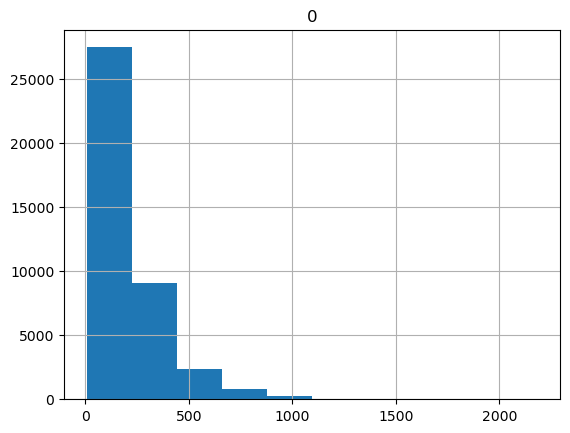

In [25]:
pd.DataFrame(number_tokens_in_docs).hist();

In [26]:
maxlen = 170

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test  = pad_sequences(X_test,  padding='post', maxlen=maxlen)

Now if we view the X_train or X_test, we will see that all the lists have same length i.e. 100. 

Also, the vocabulary_size variable now contains a value 92547 which means that our corpus has 92547 unique words.

In [27]:
def plot_history(history):

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])

    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.grid()

#### SimpleRNN

In [99]:
from keras import Sequential
from keras.layers import Embedding, SimpleRNN, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2, l1

In [109]:
model           = Sequential()
embedding_layer = Embedding(input_dim   = vocab_size, 
                            output_dim  = 32, 
                            #weights     =[embedding_matrix], 
                            input_length= maxlen,
                           )
model.add(embedding_layer)
#model.add(SimpleRNN(16, input_shape = (num_words, maxlen), return_sequences=True, return_state=False, activation="relu"))
model.add(SimpleRNN(16, 
                    input_shape        = (num_words, maxlen), 
                    return_sequences   = True, 
                    return_state       = False, 
                    activation         = "relu",
                    #kernel_regularizer = l1(0.001)
                   ))
#model.add(BatchNormalization())

#model.add(SimpleRNN(16, input_shape = (num_words, maxlen), return_sequences=True, return_state=False, activation="relu"))
#model.add(SimpleRNN(16,                                     return_sequences=True, return_state=False, activation="relu"))
model.add(SimpleRNN(32, 
                    return_sequences   = True, 
                    return_state       = False, 
                    activation         = "relu",
                    #kernel_regularizer = l1(0.001)
                   ))
#model.add(BatchNormalization())

#model.add(SimpleRNN(16, input_shape = (num_words, maxlen), return_sequences=True, return_state=False, activation="relu"))
#model.add(SimpleRNN(16,                                    return_sequences=True, return_state=False, activation="relu"))
model.add(SimpleRNN(32, 
                    return_sequences   = False, 
                    return_state       = False, 
                    activation         = "relu",
                    #kernel_regularizer = l1(0.001)
                   ))
#model.add(Dropout(0.1))  # Add dropout with a rate of 0.2
#model.add(BatchNormalization())

model.add(GlobalMaxPooling1D())

model.add(Dense(2, activation='softmax'))
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['acc'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define learning rate reduction
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.6, patience=2, min_lr=0.0001)

In [110]:
print(model.summary())

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_29 (Embedding)    (None, 170, 32)           2961504   
                                                                 
 simple_rnn_79 (SimpleRNN)   (None, 170, 16)           784       
                                                                 
 simple_rnn_80 (SimpleRNN)   (None, 170, 32)           1568      
                                                                 
 simple_rnn_81 (SimpleRNN)   (None, 170, 32)           2080      
                                                                 
 global_max_pooling1d_25 (G  (None, 32)                0         
 lobalMaxPooling1D)                                              
                                                                 
 dense_21 (Dense)            (None, 2)                 66        
                                                     

In [111]:
%%time
history = model.fit(X_train, 
                    y_train, 
                    batch_size      = 128, 
                    epochs          = 100, 
                    verbose         = 1, 
                    validation_split= 0.2,
                    callbacks       = [early_stopping, reduce_lr])

Epoch 1/100
250/250 [==============================] - 71s 240ms/step - loss: 0.4785 - acc: 0.7487 - val_loss: 0.3410 - val_acc: 0.8520 - lr: 0.0010
Epoch 2/100
250/250 [==============================] - 64s 257ms/step - loss: 0.2439 - acc: 0.9044 - val_loss: 0.3129 - val_acc: 0.8705 - lr: 0.0010
Epoch 3/100
250/250 [==============================] - 60s 241ms/step - loss: 0.1559 - acc: 0.9426 - val_loss: 0.3582 - val_acc: 0.8621 - lr: 0.0010
Epoch 4/100
250/250 [==============================] - 59s 236ms/step - loss: 0.0943 - acc: 0.9683 - val_loss: 0.4380 - val_acc: 0.8545 - lr: 0.0010
Epoch 5/100
250/250 [==============================] - 59s 234ms/step - loss: 0.0436 - acc: 0.9873 - val_loss: 0.5538 - val_acc: 0.8553 - lr: 6.0000e-04
CPU times: total: 10min 46s
Wall time: 5min 13s


313/313 [==============================] - 15s 46ms/step - loss: 0.3066 - acc: 0.8710
Test Score: 0.30659788846969604
Test Accuracy: 0.8709999918937683


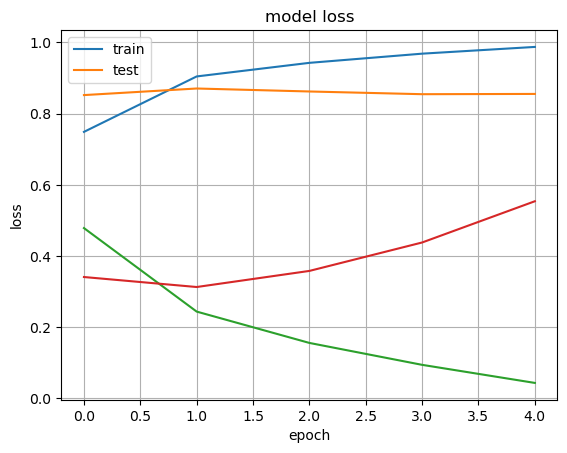

In [112]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

plot_history(history)

#### Making Predictions on Single Instance

In [89]:
np.set_printoptions(suppress=True, precision = 6)


In [91]:
index = np.random.randint(len(X))

test_review = X[index]
print(test_review)

Despite excellent trailers for Vanilla Sky was expecting to be disappointed by the film because d heard that it did not get great reviews However left the cinema completely in awe of how good Vanilla Sky is There was no bad acting at all in the whole film every single character is believable The romantic moments between Cruise character David Aames and Cruz character Sophia are tear jerkingly realistic and intimate probably due to the fact that they were soon to be real life couple The plot of Vanilla Sky will confuse you in the last third of the film and there very little chance of you guessing the ending However ends are tied up towards the end leaving you with strange mixture of feelings consisting of sadness shock and empathy for David Aames The film is intellectual and you have to pay attention throughout This isn that hard because chances are that you ll be completely drawn in to the film and won take your eyes off the screen for one second usually leave cinemas forgetting all ab

In [92]:
movie_reviews.iloc[index]

review       Despite excellent trailers for Vanilla Sky, I was expecting to be disappointed by the film because I'd heard that it did not get great reviews. However, I left the cinema completely in awe of how good Vanilla Sky is.<br /><br />There was no bad acting at all in the whole film, every single character is believable. The romantic moments between Cruise's character, David Aames and Cruz's character, Sophia are tear-jerkingly realistic and intimate (probably due to the fact that they were a soon-to-be real-life couple).<br /><br />The plot of Vanilla Sky will confuse you in the last third of the film and there's very little chance of you guessing the ending. However, ends are tied up towards the end, leaving you with a strange mixture of feelings consisting of sadness, shock and empathy for David Aames.<br /><br />The film is intellectual and you have to pay attention throughout. This isn't that hard because chances are that you'll be completely drawn in to the film and won't t

You can clearly see that this is __negative__ review. 

To predict the sentiment of this review, we have to convert this review into numeric form. We can do so using the tokenizer that we created in word embedding section. The text_to_sequences method will convert the sentence into its numeric counter part.

Next, we need to pad our input sequence as we did for our corpus. 

Finally, we can use the predict method of our model and pass it our processed input sequence. 

In [93]:
instance = tokenizer.texts_to_sequences(test_review)

In [94]:
flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]
#flat_list

In [95]:
instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

1/1 [==============================] - 0s 29ms/step


array([[0.001538, 0.998463]], dtype=float32)

In [ ]:
# Save the entire model to a file
model.save('rnn_SA_IMDB_model_simpleRNN.h5')

#### Usinf return_state=True

- we need to use functional api of tf/keras (not sequential)

In [141]:
from keras.layers import Input, Embedding, SimpleRNN, Dense, concatenate
from keras.models import Model
from keras.optimizers import RMSprop

In [142]:
# Define input layer
inputs = Input(shape=(maxlen,))

In [143]:
# Add an Embedding layer
embedding_layer = Embedding(input_dim=vocab_size, output_dim=64, input_length=maxlen)(inputs)


In [144]:
# First SimpleRNN layer
rnn1, state_h1 = SimpleRNN(8, return_sequences=True, return_state=True, activation="relu")(embedding_layer)


In [145]:
# Second SimpleRNN layer
rnn2, state_h2 = SimpleRNN(8, return_sequences=True, return_state=True, activation="relu")(rnn1)


In [146]:
# Third SimpleRNN layer
rnn3, state_h3 = SimpleRNN(8, return_sequences=False, return_state=True, activation="relu")(rnn2)


In [147]:
# Concatenate the hidden states
merged_state = concatenate([state_h1, state_h2, state_h3])

In [148]:
# Dense layer for classification
output = Dense(2, activation='softmax')(merged_state)

In [149]:
# Define the model
model = Model(inputs=inputs, outputs=output)

In [150]:
# Compile the model
model.compile(optimizer=RMSprop(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])


In [151]:
# Print the model summary
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 170)]                0         []                            
                                                                                                  
 embedding_33 (Embedding)    (None, 170, 64)              5923008   ['input_4[0][0]']             
                                                                                                  
 simple_rnn_89 (SimpleRNN)   [(None, 170, 8),             584       ['embedding_33[0][0]']        
                              (None, 8)]                                                          
                                                                                                  
 simple_rnn_90 (SimpleRNN)   [(None, 170, 8),             136       ['simple_rnn_89[0][0]'] 

In [152]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define learning rate reduction
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

In [153]:
# Train the model with early stopping and learning rate reduction
history = model.fit(X_train, 
                    y_train, 
                    batch_size      = 128, 
                    epochs          = 100, 
                    verbose         = 1, 
                    validation_split= 0.2,
                    callbacks       = [early_stopping, reduce_lr])

Epoch 1/100
250/250 [==============================] - 66s 232ms/step - loss: 0.6198 - acc: 0.6412 - val_loss: 0.4371 - val_acc: 0.8152 - lr: 0.0010
Epoch 2/100
250/250 [==============================] - 56s 224ms/step - loss: 0.4189 - acc: 0.8232 - val_loss: 0.3693 - val_acc: 0.8519 - lr: 0.0010
Epoch 3/100
250/250 [==============================] - 58s 231ms/step - loss: 0.3447 - acc: 0.8642 - val_loss: 0.3459 - val_acc: 0.8621 - lr: 0.0010
Epoch 4/100
250/250 [==============================] - 56s 225ms/step - loss: 0.3000 - acc: 0.8846 - val_loss: 0.4626 - val_acc: 0.7920 - lr: 0.0010
Epoch 5/100
250/250 [==============================] - 56s 224ms/step - loss: 0.2697 - acc: 0.9013 - val_loss: 0.4114 - val_acc: 0.8451 - lr: 0.0010
Epoch 6/100
250/250 [==============================] - 42s 169ms/step - loss: 0.1840 - acc: 0.9367 - val_loss: 0.3725 - val_acc: 0.8597 - lr: 2.0000e-04


In [154]:
# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)[1]
print("Test Accuracy:", accuracy)


313/313 [==============================] - 5s 15ms/step - loss: 0.3501 - acc: 0.8594
Test Accuracy: 0.8593999743461609


In [ ]:
# Save the entire model to a file
model.save('rnn_SA_IMDB_model_functional.h5')

#### Use Bi directioanl RNN

In [69]:
from keras.layers import Bidirectional

In [76]:
model           = Sequential()
embedding_layer = Embedding(input_dim   = vocab_size, 
                            output_dim  = 64, 
                            #weights     =[embedding_matrix], 
                            input_length= maxlen,
                           )
model.add(embedding_layer)
model.add(Bidirectional(SimpleRNN(8, input_shape = (num_words, maxlen), return_sequences=True, return_state=False, activation="relu")))
model.add(Bidirectional(SimpleRNN(8,   return_sequences=True, return_state=False, activation="relu")))
model.add(Bidirectional(SimpleRNN(8,   return_sequences=True, return_state=False, activation="relu")))

model.add(GlobalMaxPooling1D())

model.add(Dropout(0.3))  # Add dropout with a rate of 0.2

model.add(Dense(2, activation='softmax'))
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['acc'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define learning rate reduction
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

In [77]:
%%time
history = model.fit(X_train, 
                    y_train, 
                    batch_size      = 128, 
                    epochs          = 100, 
                    verbose         = 1, 
                    validation_split= 0.2,
                    callbacks       = [early_stopping, reduce_lr])

Epoch 1/100
250/250 [==============================] - 130s 445ms/step - loss: 0.6106 - acc: 0.6691 - val_loss: 0.5152 - val_acc: 0.7679 - lr: 0.0010
Epoch 2/100
250/250 [==============================] - 108s 430ms/step - loss: 0.4462 - acc: 0.8045 - val_loss: 0.3701 - val_acc: 0.8440 - lr: 0.0010
Epoch 3/100
250/250 [==============================] - 106s 423ms/step - loss: 0.3016 - acc: 0.8813 - val_loss: 0.3365 - val_acc: 0.8553 - lr: 0.0010
Epoch 4/100
250/250 [==============================] - 108s 433ms/step - loss: 0.2083 - acc: 0.9232 - val_loss: 0.3866 - val_acc: 0.8662 - lr: 0.0010
Epoch 5/100
250/250 [==============================] - 107s 429ms/step - loss: 0.1536 - acc: 0.9443 - val_loss: 0.4261 - val_acc: 0.8604 - lr: 0.0010
Epoch 6/100
250/250 [==============================] - 108s 431ms/step - loss: 0.0838 - acc: 0.9727 - val_loss: 0.5823 - val_acc: 0.8579 - lr: 2.0000e-04
CPU times: total: 29min 34s
Wall time: 11min 6s


In [78]:
# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)[1]
print("Test Accuracy:", accuracy)

313/313 [==============================] - 23s 74ms/step - loss: 0.3241 - acc: 0.8576
Test Accuracy: 0.8575999736785889


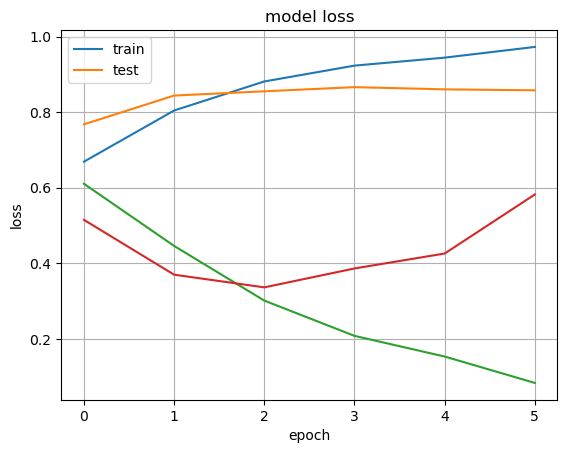

In [79]:
plot_history(history)